Pregunta 7 Matias Opazo Pino

Aqui importamos todas las librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad

Luego definimos las parámetros cosmológicos a utilizar

In [6]:
# Definición de parámetros del modelo lambda CDM
om_r = 9.2e-5         
om_m = 0.315          
om_lambda = 0.685     
om_k = 0.0        
h_0 = 0.674           
w = -1.0              
c = 299792.458       

Posteriormente definimos las ecuaciones a utilizar, en este caso definimos el parámetro de hubble, la función F_k(shi), E(z) y shi(z). En tal caso las definimos para que reciban un omega_m y omega_lambda para el posterior graficado.

In [ ]:
def H(z, om_m, om_lambda, args):
    om_r, om_k, h_0, w, c = args
    h = np.sqrt(h_0**2*(om_r*(1+z)**4 + om_m*(1+z)**3 + om_lambda*(1+z)**(3*(1+w)) + om_k*(1+z)**2))
    return h

def f_k(shi, om_m, om_lambda, args):
    om_r, om_k, h_0, w, c = args
    if om_k > 0:
        return c/np.sqrt(om_k)*np.sinh(np.sqrt(om_k*shi))
    elif om_k == 0:
        return shi*c/h_0
    elif 0 > om_k:
        return c/np.sqrt(-om_k)*np.sinh(np.sqrt(-om_k*shi))

def E_z(z, om_m, om_lambda, args):
    om_r, om_k, h_0, w, c = args
    return H(z, om_m, om_lambda, args)/h_0
    
def Shi(z, om_m, om_lambda, args):
    def integrand(x, om_m, om_lambda, args):
        return 1.0 / E_z(x, om_m, om_lambda, args)
    
    chi, _ = quad(integrand, 0, z, args=(om_m, om_lambda, args))
    return chi

Por último implementamos una grilla para omega_m - omega_lambda con tal de graficar los valores de F_k para distintas tuplas de este plano, en este caso también se debe tomar en cuenta el redshift al que se grafica, se escogerán 3 redshifts equidistantes del 1 al 1000 para la gráfica, luego se harán lineas de contorno para las valores dónde F_k sea constante.

C:\Users\matia\AppData\Local\Temp\ipykernel_4884\564238325.py:3: RuntimeWarning: invalid value encountered in sqrt
  h = np.sqrt(h_0**2*(om_r*(1+z)**4 + om_m*(1+z)**3 + om_lambda*(1+z)**(3*(1+w)) + om_k*(1+z)**2))
C:\Users\matia\AppData\Local\Temp\ipykernel_4884\564238325.py:32: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  chi, _ = quad(integrand, 0, z, args=(om_m, om_lambda, args))


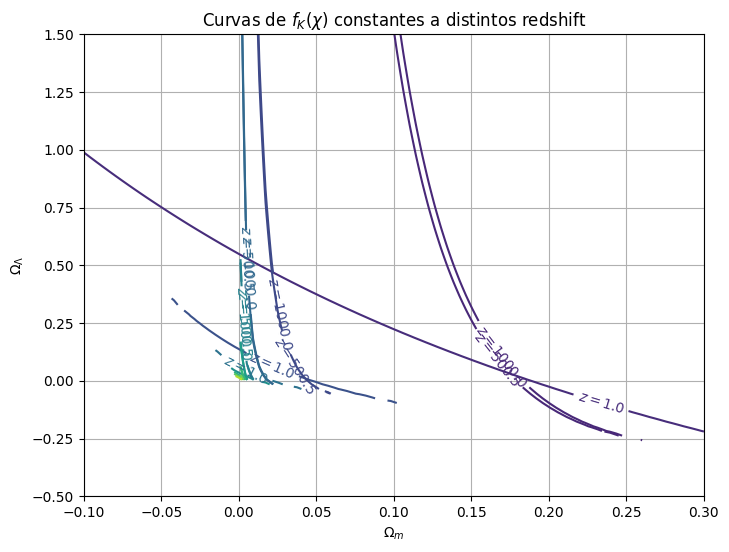

In [37]:
# generar grilla de omega_m - omega_lambda
om = np.linspace(-0.1, 0.3, 100)
oLambda = np.linspace(-0.5, 1.5, 100)

# Creamos la grilla
Om, OLambda = np.meshgrid(om, oLambda)
args = [om_r, om_k, h_0, w, c]

def f_k_grid(z, Om, Ol):
    shi = Shi(z, Om, Ol, args)
    efe = f_k(shi, Om, Ol, args)
    return efe

# Definimos los redshifts que queremos
z_values = np.linspace(1, 1000, 3)  # 5 valores entre 1 y 1000
plt.figure(figsize=(8,6))
    
for z in z_values:
    #z = 1000
    f_k_grid_vec = np.vectorize(f_k_grid)
    F = f_k_grid_vec(z, Om, OLambda)
    # Dibujar contornos
    CS = plt.contour(Om, OLambda, F, cmap='viridis')
    plt.clabel(CS, inline=True, fontsize=10, fmt=r'$z=%.1f$' % z)

plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\Omega_\Lambda$')
plt.title(r'Curvas de $f_K(\chi)$ constantes a distintos redshift')
plt.grid(True)
plt.show()


Finalmente se ven las curvas dónde F_k es constante para ciertas tuplas omega_m - omega_k a distintos redshifts.